# Exploratory Data Analysis for Fraud Detection (Optimized)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8')
os.makedirs('../reports', exist_ok=True)

In [2]:
# Load data
df = pd.read_csv('../data/creditcard.csv')
print(f"Dataset shape: {df.shape}")
print(f"Fraud rate: {df['Class'].mean()*100:.2f}%")

Dataset shape: (284807, 31)
Fraud rate: 0.17%


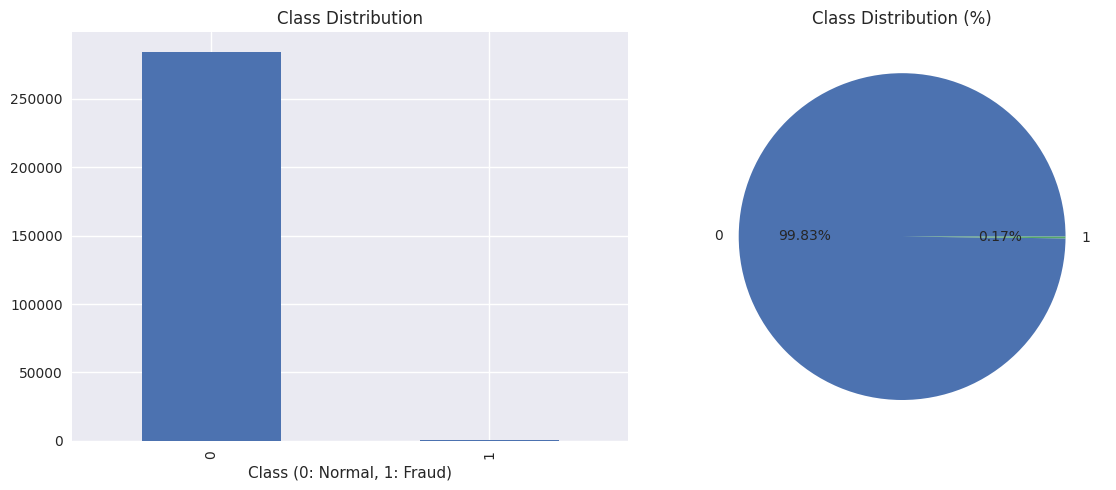

In [3]:
# Class imbalance visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Class'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Class (0: Normal, 1: Fraud)')

df['Class'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.2f%%')
axes[1].set_title('Class Distribution (%)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../reports/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Transaction patterns (optimized)
df['Hour'] = (df['Time'] / 3600) % 24

# Sample for faster processing
sample_size = min(50000, len(df))
df_sample = df.sample(sample_size, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Transactions by hour
hourly_counts = df_sample.groupby(['Hour', 'Class']).size().unstack(fill_value=0)
hourly_counts.plot(kind='bar', ax=axes[0,0], width=0.8)
axes[0,0].set_title('Transactions by Hour')
axes[0,0].legend(['Normal', 'Fraud'])

# Amount distribution
df_sample[df_sample['Class']==0]['Amount'].hist(bins=30, alpha=0.7, label='Normal', ax=axes[0,1])
df_sample[df_sample['Class']==1]['Amount'].hist(bins=30, alpha=0.7, label='Fraud', ax=axes[0,1])
axes[0,1].set_title('Amount Distribution')
axes[0,1].set_yscale('log')
axes[0,1].legend()

# Fraud rate by hour
fraud_rate = df_sample.groupby('Hour')['Class'].mean()
fraud_rate.plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Fraud Rate by Hour')

# Amount vs Time scatter
scatter_sample = df_sample.sample(5000)
scatter = axes[1,1].scatter(scatter_sample['Time'], scatter_sample['Amount'], 
                           c=scatter_sample['Class'], alpha=0.6, cmap='coolwarm', s=10)
axes[1,1].set_title('Amount vs Time')
plt.colorbar(scatter, ax=axes[1,1])

plt.tight_layout()
plt.savefig('../reports/transaction_patterns.png', dpi=150, bbox_inches='tight')
plt.show()
print(f'Used {sample_size:,} transactions for analysis')

KeyboardInterrupt: 

In [ ]:
# Feature correlation with fraud (using sample)
v_features = [col for col in df.columns if col.startswith('V')]
corr_sample = df.sample(min(20000, len(df)), random_state=42)
corr_with_class = corr_sample[v_features + ['Class']].corr()['Class'].sort_values(key=abs, ascending=False)

plt.figure(figsize=(12, 8))
corr_with_class[1:-1].plot(kind='barh')
plt.title('Feature Correlation with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('../reports/feature_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

print("Top 10 features correlated with fraud:")
print(corr_with_class[1:11])

In [ ]:
# Feature distributions comparison (optimized)
top_features = corr_with_class[1:9].index
dist_sample = df.sample(min(10000, len(df)), random_state=42)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    normal_data = dist_sample[dist_sample['Class']==0][feature]
    fraud_data = dist_sample[dist_sample['Class']==1][feature]
    
    axes[i].hist(normal_data, bins=25, alpha=0.7, label='Normal', density=True)
    axes[i].hist(fraud_data, bins=25, alpha=0.7, label='Fraud', density=True)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].legend()

plt.tight_layout()
plt.savefig('../reports/feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

print("EDA complete. Plots saved to reports/ directory.")
print(f"Analysis used samples for performance optimization.")